In [1]:
import pandas as pd

In [2]:
tesla_df = pd.read_csv('tesla_deaths_datos.csv')

In [3]:
pd.read_csv('tesla_deaths_datos.csv')

,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,...,Model,AutoPilot claimed,Verified Tesla Autopilot Death,Source,FARS-NHTSA case filing,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,2020.0,9/17/2020,USA,GA,Tesla loses control and crashes into bus shel...,1,-,-,-,1,...,3,1,-,https://www.ajc.com/news/1-dead-after-tesla-d...,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.0,9/12/2020,USA,CA,"Car lands on Tesla, other vehicle driver dies",1,-,-,1,-,...,NaN,-,-,https://fox5sandiego.com/news/local-news/1-pe...,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.0,9/6/2020,USA,IL,"Tesla runs thru red light, crashes, driver di...",1,1,-,-,-,...,NaN,-,-,https://www.dailyherald.com/news/20200906/dri...,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.0,9/5/2020,China,NaN,"Tesla crashes into crowd, 2 dead and several ...",2,-,-,-,2,...,X,-,-,https://www.globaltimes.cn/content/1200006.sh...,NaN,NaN,NaN,NaN,NaN,NaN
4,2020.0,8/24/2020,USA,VA,"Two car collision at intersection, other driv...",1,-,-,1,-,...,X,-,-,https://www.loudountimes.com/news/update-mult...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
tesla_df.columns

Index(['Year', 'Date', ' Country ', ' State ', ' Description ', ' Deaths ',
       ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' AutoPilot claimed ', ' Verified Tesla Autopilot Death ', ' Source ',
       ' FARS-NHTSA case filing ', ' Note ', ' Deceased 1 ', ' Deceased 2 ',
       ' Deceased 3 ', ' Deceased 4 '],
      dtype='object')

In [5]:
label_to_snake_case = lambda label: label.lower().replace('/',' ').replace(' ','_').replace('___','_').replace('__','_').replace('+','_').replace('-','_')

In [6]:
rename_dict = {}

for label in tesla_df.columns[0:2]:
    rename_dict[label] = label_to_snake_case(label)
    
for label in tesla_df.columns[2:]:
    rename_dict[label] = label_to_snake_case(label[1:-1])
    
rename_dict

{'Year': 'year',
 'Date': 'date',
 ' Country ': 'country',
 ' State ': 'state',
 ' Description ': 'description',
 ' Deaths ': 'deaths',
 ' Tesla driver ': 'tesla_driver',
 ' Tesla occupant ': 'tesla_occupant',
 ' Other vehicle ': 'other_vehicle',
 ' Cyclists/ Peds ': 'cyclists_peds',
 ' TSLA+cycl / peds ': 'tsla_cycl_peds',
 ' Model ': 'model',
 ' AutoPilot claimed ': 'autopilot_claimed',
 ' Verified Tesla Autopilot Death ': 'verified_tesla_autopilot_death',
 ' Source ': 'source',
 ' FARS-NHTSA case filing ': 'fars_nhtsa_case_filing',
 ' Note ': 'note',
 ' Deceased 1 ': 'deceased_1',
 ' Deceased 2 ': 'deceased_2',
 ' Deceased 3 ': 'deceased_3',
 ' Deceased 4 ': 'deceased_4'}

In [7]:
tesla_df = tesla_df.rename(columns=rename_dict)

In [8]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            131 non-null    float64
 1   date                            131 non-null    object 
 2   country                         131 non-null    object 
 3   state                           91 non-null     object 
 4   description                     131 non-null    object 
 5   deaths                          135 non-null    object 
 6   tesla_driver                    136 non-null    object 
 7   tesla_occupant                  136 non-null    object 
 8   other_vehicle                   136 non-null    object 
 9   cyclists_peds                   136 non-null    object 
 10  tsla_cycl_peds                  136 non-null    object 
 11  model                           76 non-null     object 
 12  autopilot_claimed               135 

In [9]:
tesla_df.shape

(141, 21)

In [10]:
tesla_df.describe()

,year,deceased_4
count,131.000000,0.0
mean,2018.160305,NaN
std,1.731237,NaN
min,2013.000000,NaN
25%,2017.000000,NaN
50%,2019.000000,NaN
75%,2019.000000,NaN
max,2020.000000,NaN


| **DATA TABLE BEFORE CLEANING** |                       |                              |                     |
|:------------------------------:|:---------------------:|:----------------------------:|:-------------------:|
| _Column_                       | _Python Object class_ |          _Data type_         |        _OBS_        |
| year                           | float                 | numeric, continuo o flotante | convert to int      |
| date                           | str                   | categorical ordinal          | convert to datetime |
| country                        | str                   | categorical nominal          |                     |
| state                          | str                   | categorical nominal          |                     |
| description                    | str                   | categorical nominal          |                     |
| deaths                         | str                   | categorical ordinal          | convert to int      |
| tesla_driver                   | str                   | categorical boolean          | convert to boolean  |
| tesla_occupant                 | str                   | categorical boolean          | convert to boolean  |
| other_vehicle                  | str                   | categorical boolean          | convert to boolean  |
| cyclists_peds                  | str                   | categorical boolean          | convert to boolean  |
| tsla_cycl_peds                 | str                   | categorical boolean          | convert to boolean  |
| model                          | str                   | categorical nominal          |                     |
| autopilot_claimed              | str                   | categorical boolean          | convert to boolean  |
| verified_tesla_autopilot_death | str                   | categorical boolean          | convert to boolean  |
| source                         | str                   | categorical nominal          |                     |
| fars_nhtsa_case_filing         | str                   | categorical nominal          | mostly NaN          |
| note                           | str                   | categorical nominal          | mostly NaN          |
| deceased_1                     | str                   | categorical nominal          | name of deceased    |
| deceased_2                     | str                   | categorical nominal          | name of deceased    |
| deceased_3                     | str                   | categorical nominal          | name of deceased    |
| deceased_4                     | float                 | numeric, continuo o flotante | all NaN             |

In [12]:
tesla_df = tesla_df.dropna(how='all') 

Drop 4 rows all NaN

In [13]:
tesla_df.duplicated().sum()

0

In [14]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 140
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            131 non-null    float64
 1   date                            131 non-null    object 
 2   country                         131 non-null    object 
 3   state                           91 non-null     object 
 4   description                     131 non-null    object 
 5   deaths                          135 non-null    object 
 6   tesla_driver                    136 non-null    object 
 7   tesla_occupant                  136 non-null    object 
 8   other_vehicle                   136 non-null    object 
 9   cyclists_peds                   136 non-null    object 
 10  tsla_cycl_peds                  136 non-null    object 
 11  model                           76 non-null     object 
 12  autopilot_claimed               135 

tesla_

In [15]:
year_na = tesla_df.year.isna()
tesla_df = tesla_df[year_na==False]

Hay columnas que tienen datos Nan con el resto sin sentido, se sacan estos datos por considerarlos irrelevantes para el análisis

In [18]:
tesla_df = tesla_df.apply(lambda x: x.replace('  -   ',0).replace(' - ',0).replace('1',1))

In [19]:
type_dic = {'year':'int64',
            'deaths':'int64',
            'date':'datetime64',
            'tesla_driver':'bool',
            'tesla_occupant':'bool',
            'other_vehicle':'bool',
            'cyclists_peds':'bool',
            'tsla_cycl_peds':'bool',
            'autopilot_claimed':'bool',
            'verified_tesla_autopilot_death':'bool'}

In [40]:
tesla_df = tesla_df.astype(type_dic)

In [90]:
deaths_autopilot = tesla_df.groupby('autopilot_claimed')['deaths'].sum()
deaths_autopilot = deaths_autopilot.rename({False:'No',True:'Yes'})
deaths_autopilot

autopilot_claimed
No     132
Yes     17
Name: deaths, dtype: int64

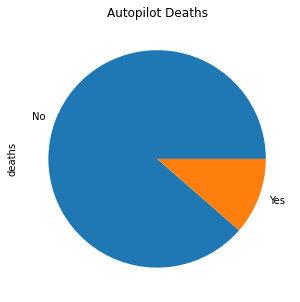

In [74]:
plot_deaths_autopilot = deaths_autopilot.plot(kind='pie',figsize=(20,5),title='Autopilot Deaths - Plot 1')

In [56]:
deaths_by_country = tesla_df.groupby('country')['deaths'].sum().sort_values(ascending=False)

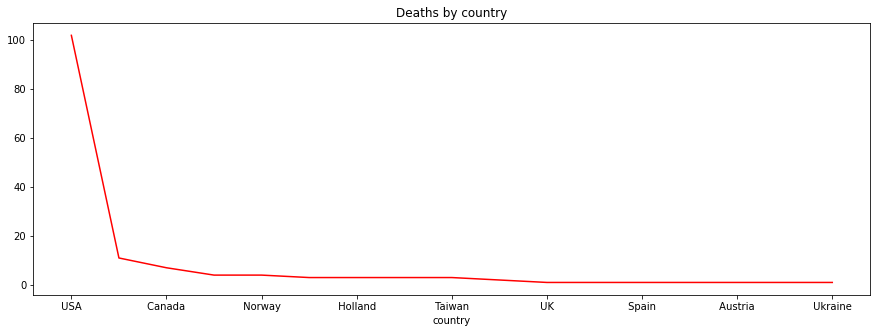

In [57]:
plot_deaths_by_country = deaths_by_country.plot(kind='line',figsize=(15,5),c='red',title='Deaths by country - Plot 2')

In [59]:
deaths_by_state = tesla_df.groupby('state')['deaths'].sum().sort_values(ascending=False)

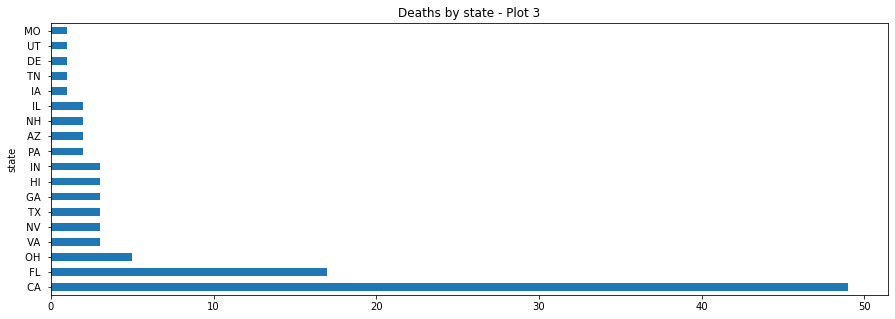

In [76]:
plot_deaths_by_state = deaths_by_state.plot(kind='barh',figsize=(15,5),title='Deaths by state - Plot 3')

In [31]:
deaths_by_year = tesla_df.groupby('year')['deaths'].sum().sort_values(ascending=False)
deaths_by_year

year
2019    50
2020    36
2018    21
2016    16
2017    12
2014     6
2015     5
2013     3
Name: deaths, dtype: int64

<AxesSubplot:>

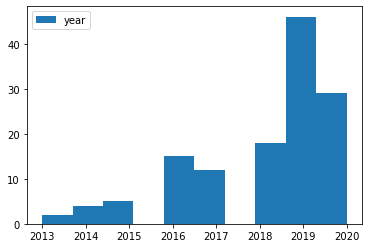

In [39]:
tesla_df.year.hist(bins=10,legend=True,grid=False)

<AxesSubplot:title={'center':'Deaths by date - Plot 4'}, xlabel='date', ylabel='deaths'>

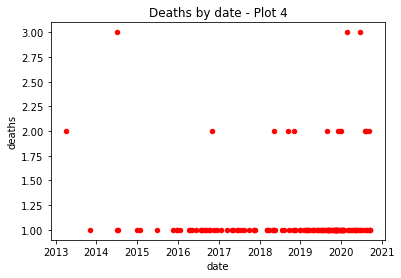

In [81]:
tesla_df.plot.scatter(x='date', y='deaths', c='red',title='Deaths by date - Plot 4')

| **DATA TABLE AFTER CLEANING**  |                       |                              |
|:------------------------------:|:---------------------:|:----------------------------:|
| _Column_                       | _Python Object class_ |          _Data type_         |
|              year              |          int          | numeric, continuo o flotante |
|              date              |        datetime       |      categorical ordinal     |
|             country            |          str          |      categorical nominal     |
|              state             |          str          |      categorical nominal     |
|           description          |          str          |      categorical nominal     |
|             deaths             |          int          |      categorical ordinal     |
|          tesla_driver          |        boolean        |      categorical boolean     |
|         tesla_occupant         |        boolean        |      categorical boolean     |
|          other_vehicle         |        boolean        |      categorical boolean     |
|          cyclists_peds         |        boolean        |      categorical boolean     |
|         tsla_cycl_peds         |        boolean        |      categorical boolean     |
|              model             |          str          |      categorical nominal     |
|        autopilot_claimed       |        boolean        |      categorical boolean     |
| verified_tesla_autopilot_death |        boolean        |      categorical boolean     |
|             source             |          str          |      categorical nominal     |
|     fars_nhtsa_case_filing     |          str          |      categorical nominal     |
|              note              |          str          |      categorical nominal     |
|           deceased_1           |          str          |      categorical nominal     |
|           deceased_2           |          str          |      categorical nominal     |
|           deceased_3           |          str          |      categorical nominal     |
|           deceased_4           |         float         | numeric, continuo o flotante |

In [82]:
deaths_by_model = tesla_df.groupby('model')['deaths'].sum().sort_values(ascending=False)
deaths_by_model

model
 S      42
  3     27
 X      15
Name: deaths, dtype: int64

In [88]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   year                            131 non-null    int64         
 1   date                            131 non-null    datetime64[ns]
 2   country                         131 non-null    object        
 3   state                           91 non-null     object        
 4   description                     131 non-null    object        
 5   deaths                          131 non-null    int64         
 6   tesla_driver                    131 non-null    bool          
 7   tesla_occupant                  131 non-null    bool          
 8   other_vehicle                   131 non-null    bool          
 9   cyclists_peds                   131 non-null    bool          
 10  tsla_cycl_peds                  131 non-null    bool          
 11  model 

In [89]:
tesla_df

,year,date,country,state,description,deaths,tesla_driver,tesla_occupant,other_vehicle,cyclists_peds,...,model,autopilot_claimed,verified_tesla_autopilot_death,source,fars_nhtsa_case_filing,note,deceased_1,deceased_2,deceased_3,deceased_4
0,2020,2020-09-17,USA,GA,Tesla loses control and crashes into bus shel...,1,False,False,False,True,...,3,True,False,https://www.ajc.com/news/1-dead-after-tesla-d...,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,2020-09-12,USA,CA,"Car lands on Tesla, other vehicle driver dies",1,False,False,True,False,...,NaN,False,False,https://fox5sandiego.com/news/local-news/1-pe...,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,2020-09-06,USA,IL,"Tesla runs thru red light, crashes, driver di...",1,True,False,False,False,...,NaN,False,False,https://www.dailyherald.com/news/20200906/dri...,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,2020-09-05,China,NaN,"Tesla crashes into crowd, 2 dead and several ...",2,False,False,False,True,...,X,False,False,https://www.globaltimes.cn/content/1200006.sh...,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,2020-08-24,USA,VA,"Two car collision at intersection, other driv...",1,False,False,True,False,...,X,False,False,https://www.loudountimes.com/news/update-mult...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2014,2014-07-14,USA,CA,Tesla kills motorcyclist,1,False,False,True,False,...,NaN,False,False,http://injurylawcentral.com/blog/dwight-dene-...,https://www-fars.nhtsa.dot.gov/QueryTool/Quer...,NaN,NaN,NaN,NaN,NaN
127,2014,2014-07-04,USA,CA,Thief crashes stolen Tesla,1,True,False,False,False,...,NaN,False,False,https://www.theverge.com/2014/7/10/5888463/ca...,https://www-fars.nhtsa.dot.gov/QueryTool/Quer...,NaN,Joshua Slot,NaN,NaN,NaN
128,2014,2014-07-04,USA,CA,Tesla rear ends stopped car,3,False,False,True,False,...,NaN,False,False,https://insideevs.com/3-dead-in-toyota-coroll...,https://www-fars.nhtsa.dot.gov/QueryTool/Quer...,NaN,NaN,NaN,NaN,NaN
129,2013,2013-11-02,USA,CA,Tesla kills cyclist,1,False,False,False,True,...,NaN,False,False,http://www.santacruzsentinel.com/general-news...,No FARS report,NaN,NaN,NaN,NaN,NaN
